## Ejercicios de pair programming 27 enero: Preprocesado

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### Info columnas
|Column| Type | Description |
|-------|--------------|-------------|
|distance_from_home| float64|	The distance from home where the transaction happened
|distance_from_last_transaction| float64|	The distance from last transaction happened.
|ratio_to_median_purchase_price| float64|	Ratio of purchased price transaction to median purchase price.
|repeat_retailer| float64|	Is the transaction happened from same retailer. 
|used_chip| float64|	Is the transaction through chip (credit card)
|used_pin_number| float64|	Is the transaction happened by using PIN number. 
|online_order | float64| Is the transaction an online order.
|fraud | float64| Is the transaction fraudulent.   

Enlace del *DataFrame* *[card_transdata](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud)*

In [2]:
df = pd.read_csv("../datos/card_transdata.csv")
df.head(2)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0


In [3]:
columnas_categoria = ["repeat_retailer", "used_chip", "used_pin_number", "online_order", "fraud"]

for i in columnas_categoria:
    df[i] = df[i].astype("int64")

In [4]:
#Estandarizamos nuestras columnas númericas con StandardScaler
scaler = StandardScaler()

In [5]:
numericas = df.select_dtypes(include = "float64") #Solo incluimos las float ya que las dicotómicas las tenemos como int
numericas.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,57.877857,0.311140,1.945940
1,10.829943,0.175592,1.294219
2,5.091079,0.805153,0.427715
3,2.247564,5.600044,0.362663
4,44.190936,0.566486,2.222767


In [6]:
scaler.fit(numericas)
# transformamos los datos

X_escaladas = scaler.transform(numericas)

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,0.477882,-0.182849,0.043491
1,-0.241607,-0.188094,-0.189300


In [7]:
df.drop(["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"], axis = 1, inplace=True) #Eliminamos las columnas sin estandarizar
df.head()

,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,1,1,0,0,0
1,1,0,0,0,0
2,1,0,0,1,0
3,1,1,0,1,0
4,1,1,0,1,0


In [8]:
df = pd.concat([df, numericas_estandar], axis = 1)#Unimos las columnas estandarizadas
# chequeamos que esta todo bien
df.head()

,repeat_retailer,used_chip,used_pin_number,online_order,fraud,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,1,1,0,0,0,0.477882,-0.182849,0.043491
1,1,0,0,0,0,-0.241607,-0.188094,-0.189300
2,1,0,0,1,0,-0.329369,-0.163733,-0.498812
3,1,1,0,1,0,-0.372854,0.021806,-0.522048
4,1,1,0,1,0,0.268572,-0.172968,0.142373


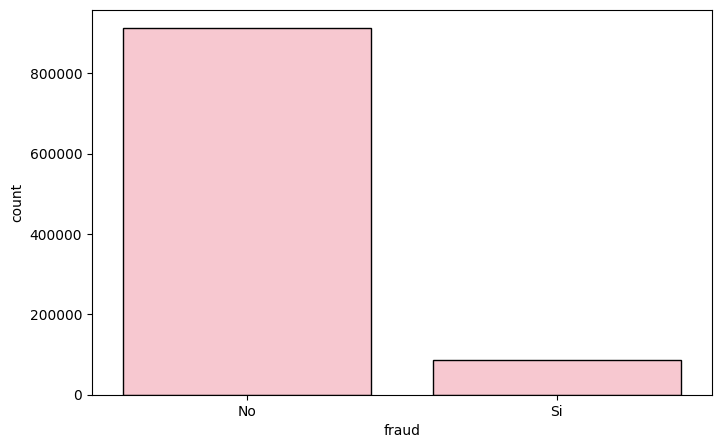

In [9]:
#Comprobamos la distribución de nuestros datos

plt.figure(figsize=(8,5)) 

fig1 = sns.countplot(data = df, x = "fraud",  color = "pink",  edgecolor='black')
fig1.set(xticklabels=["No", "Si"]) 
plt.show()

In [10]:
df.to_csv("../datos/card_transdata_esta.csv") #Guardamos nuestros datos estandarizados

In [11]:
df_final = df.copy() #Hacemos una copia para hacer un balanceo de nuestra variable respuesta ya que está muy desbalanceada

In [12]:
y = df_final['fraud']
X = df_final.drop('fraud', axis=1)

#dividimos en sets de entrenamiento y test
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, train_size=0.7)

In [13]:
# iniciamos el método SMOTETomek para hacer el balance de nuestra variable respuesta
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train_final, y_train_final)

In [ ]:
print (f"Distribución antes del ajuste \n {y_train_final.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

Distribución antes del ajuste 
 0    638840
1     61160
Name: fraud, dtype: int64
..............................................................
Distribución después del ajuste 
 0    638821
1    638821
Name: fraud, dtype: int64


In [ ]:
df_final_balanceado_test = pd.concat([X_test_final,y_test_final], axis = 1) #Unimos los datos del test

In [ ]:
df_final_balanceado_train = pd.concat([X_train_res,y_train_res], axis = 1) #Unimos los datos del train balanceados

In [ ]:
df_final_balanceado = pd.concat([df_final_balanceado_test,df_final_balanceado_train], axis = 0) #Unimos los datos balanceados en un df nuevo

In [ ]:
df['fraud'].value_counts()

0    912597
1     87403
Name: fraud, dtype: int64

In [ ]:
df_final_balanceado['fraud'].value_counts() 

0    912578
1    665064
Name: fraud, dtype: int64

In [ ]:
df_final_balanceado.duplicated().sum()#Comprobamos que no se hayan generado duplicados

0

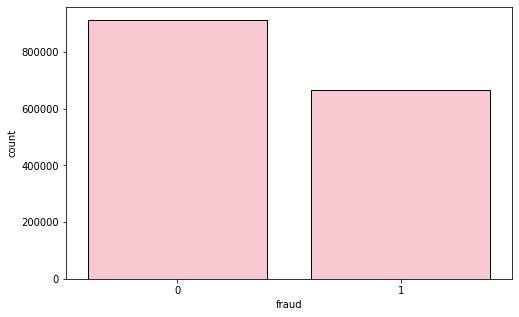

In [ ]:
plt.figure(figsize=(8,5)) #Comprobamos que nuestros datos de la variable respuesta esta más balanceado

fig1 = sns.countplot(data = df_final_balanceado, x = "fraud",  color = "pink",  edgecolor='black')
fig1.set(xticklabels=["0", "1"]) 
plt.show()

In [ ]:
df_final_balanceado.to_csv("../datos/card_transdata_balanceado.csv") #Guardamos los datos balanceados